In [ ]:
from getpass import getpass
import os

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download shai-training-2024-a-level-2

 78% 20.0M/25.7M [00:00<00:00, 99.0MB/s]
100% 25.7M/25.7M [00:00<00:00, 93.6MB/s]


In [ ]:
!unzip shai-training-2024-a-level-2.zip

Archive:  shai-training-2024-a-level-2.zip
  inflating: Test.csv                
  inflating: Train.csv               
  inflating: Valid.csv               
  inflating: sample_submission.csv   


In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
import spacy
import scipy
import string
import seaborn as sns
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.linear_model import LogisticRegression



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
 #Reading the dataset
df = pd.read_csv("/content/Train.csv")
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


# **Exploring Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [ ]:
# Checking for missing values

df.isnull().values.any()

False

In [ ]:
df['label'].value_counts()

label
0    20019
1    19981
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

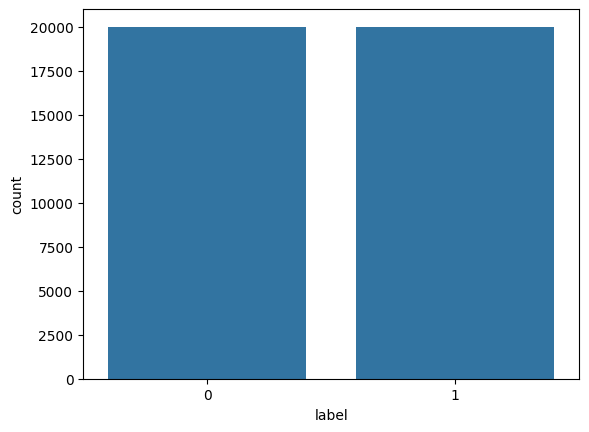

In [ ]:
sns.countplot(x='label', data=df)

# **Text Preprocessing**

In [ ]:
#removing punctuation
df['text'] = df['text'].str.replace('[^\w\s]','')
df['text'] = df['text'].str.replace('/><br','')
df['text'] = df['text'].str.replace("-", "")

In [ ]:
df['text'][0]

'I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.'

In [ ]:
#applying stopwords removal
def stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df["text"] = df["text"].apply(stopwords)

In [ ]:
df['text'][0]

'I grew (b. 1965) watching loving Thunderbirds. All mates school watched. We played "Thunderbirds" school, lunch school. We wanted Virgil Scott. No one wanted Alan. Counting 5 became art form. I took children see movie hoping would get glimpse I loved child. How bitterly disappointing. The high point snappy theme tune. Not could compare original score Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns series Gerry Anderson wife created. Jonatha Frakes hand directors chair, version completely hopeless. A waste film. Utter rubbish. A CGI remake may acceptable replacing marionettes Homo sapiens subsp. sapiens huge error judgment.'

In [ ]:
#removing urls
df['text'] = df.text.replace(regex = {r'<p>': ' ', r'</p>': '', r'<a.*?\/a>': '+'})

In [ ]:
df['text'][0]

'I grew (b. 1965) watching loving Thunderbirds. All mates school watched. We played "Thunderbirds" school, lunch school. We wanted Virgil Scott. No one wanted Alan. Counting 5 became art form. I took children see movie hoping would get glimpse I loved child. How bitterly disappointing. The high point snappy theme tune. Not could compare original score Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns series Gerry Anderson wife created. Jonatha Frakes hand directors chair, version completely hopeless. A waste film. Utter rubbish. A CGI remake may acceptable replacing marionettes Homo sapiens subsp. sapiens huge error judgment.'

In [ ]:
#toknize text
df['text'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

In [ ]:
df['text'][0]

['I',
 'grew',
 '(',
 'b',
 '.',
 '1965',
 ')',
 'watching',
 'loving',
 'Thunderbirds',
 '.',
 'All',
 'mates',
 'school',
 'watched',
 '.',
 'We',
 'played',
 '``',
 'Thunderbirds',
 "''",
 'school',
 ',',
 'lunch',
 'school',
 '.',
 'We',
 'wanted',
 'Virgil',
 'Scott',
 '.',
 'No',
 'one',
 'wanted',
 'Alan',
 '.',
 'Counting',
 '5',
 'became',
 'art',
 'form',
 '.',
 'I',
 'took',
 'children',
 'see',
 'movie',
 'hoping',
 'would',
 'get',
 'glimpse',
 'I',
 'loved',
 'child',
 '.',
 'How',
 'bitterly',
 'disappointing',
 '.',
 'The',
 'high',
 'point',
 'snappy',
 'theme',
 'tune',
 '.',
 'Not',
 'could',
 'compare',
 'original',
 'score',
 'Thunderbirds',
 '.',
 'Thankfully',
 'early',
 'Saturday',
 'mornings',
 'one',
 'television',
 'channel',
 'still',
 'plays',
 'reruns',
 'series',
 'Gerry',
 'Anderson',
 'wife',
 'created',
 '.',
 'Jonatha',
 'Frakes',
 'hand',
 'directors',
 'chair',
 ',',
 'version',
 'completely',
 'hopeless',
 '.',
 'A',
 'waste',
 'film',
 '.',
 'Utte

In [ ]:
df['text'] = df['text'].astype(str)

In [ ]:
df['text'][0]

'[\'I\', \'grew\', \'(\', \'b\', \'.\', \'1965\', \')\', \'watching\', \'loving\', \'Thunderbirds\', \'.\', \'All\', \'mates\', \'school\', \'watched\', \'.\', \'We\', \'played\', \'``\', \'Thunderbirds\', "\'\'", \'school\', \',\', \'lunch\', \'school\', \'.\', \'We\', \'wanted\', \'Virgil\', \'Scott\', \'.\', \'No\', \'one\', \'wanted\', \'Alan\', \'.\', \'Counting\', \'5\', \'became\', \'art\', \'form\', \'.\', \'I\', \'took\', \'children\', \'see\', \'movie\', \'hoping\', \'would\', \'get\', \'glimpse\', \'I\', \'loved\', \'child\', \'.\', \'How\', \'bitterly\', \'disappointing\', \'.\', \'The\', \'high\', \'point\', \'snappy\', \'theme\', \'tune\', \'.\', \'Not\', \'could\', \'compare\', \'original\', \'score\', \'Thunderbirds\', \'.\', \'Thankfully\', \'early\', \'Saturday\', \'mornings\', \'one\', \'television\', \'channel\', \'still\', \'plays\', \'reruns\', \'series\', \'Gerry\', \'Anderson\', \'wife\', \'created\', \'.\', \'Jonatha\', \'Frakes\', \'hand\', \'directors\', \'ch

In [ ]:
#apply lemmatization
from nltk.stem import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

df['text'] = df['text'].apply(lambda text: ' '.join([lmtzr.lemmatize(word) for word in nltk.word_tokenize(text)]))


In [ ]:
tfidf_vectorizer = TfidfVectorizer()


In [ ]:
tfidf_vectorizer.fit(df['text'])

TfidfVectorizer()

In [ ]:
chunk_size = 1000
chunks = [df['text'][i:i + chunk_size] for i in range(0, len(df), chunk_size)]


In [ ]:
x_vec = None

# Fit the vectorizer on each chunk and concatenate
for chunk in chunks:
    chunk_vec = tfidf_vectorizer.transform(chunk)
    if x_vec is None:
        x_vec = chunk_vec
    else:
        x_vec = scipy.sparse.vstack([x_vec, chunk_vec])

In [ ]:
x_train,y_train=x_vec,df['label']

In [ ]:
df_v=pd.read_csv('/content/Valid.csv')

In [ ]:
df_v

,text,label
0,It's been about 14 years since Sharon Stone aw...,0
1,someone needed to make a car payment... this i...,0
2,The Guidelines state that a comment must conta...,0
3,This movie is a muddled mish-mash of clichés f...,0
4,Before Stan Laurel became the smaller half of ...,0
...,...,...
4995,"Man, I loved this movie! This really takes me ...",1
4996,Recovery is an incredibly moving piece of work...,1
4997,"You can take the crook out of the joint, but i...",1
4998,FUTZ is the only show preserved from the exper...,1


In [ ]:
df_v['text'] = df_v['text'].str.replace('[^\w\s]','')
df_v['text'] = df_v['text'].str.replace('/><br','')
df_v['text'] = df_v['text'].str.replace("-", "")

In [ ]:
#applying stopwords removal
def stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df_v["text"] = df_v["text"].apply(stopwords)

In [ ]:
#removing urls
df_v['text'] = df_v.text.replace(regex = {r'<p>': ' ', r'</p>': '', r'<a.*?\/a>': '+'})

In [ ]:
#toknize text
df_v['text'] = df_v.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

In [ ]:
df_v['text'] = df_v['text'].astype(str)

In [ ]:
#apply lemmatization

df_v['text'] = df_v['text'].apply(lambda text: ' '.join([lmtzr.lemmatize(word) for word in nltk.word_tokenize(text)]))


In [ ]:
x_vald=tfidf_vectorizer.transform(df_v.text)

In [ ]:
y_vald=df_v.label

##  Naive Bayes Model

In [ ]:
nvb= MultinomialNB()



In [ ]:
nvb.fit(x_train, y_train)


MultinomialNB()

In [ ]:
nvb_pre=nvb.predict(x_vald)

In [ ]:
precision, recall, fscore, support = score(y_vald, nvb_pre)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {fscore}")
print(f"Support: {support}")

Precision: [0.85264386 0.87932455]
Recall: [0.88213998 0.84924423]
F1-score: [0.86714116 0.86402266]
Support: [2486 2514]


In [ ]:
accuracy_nvb, conf_matrix1 = accuracy_score(y_vald, nvb_pre), confusion_matrix(y_vald, nvb_pre)

In [ ]:
print({'accuracy_nvb=':accuracy_nvb})

{'accuracy_nvb=': 0.8656}


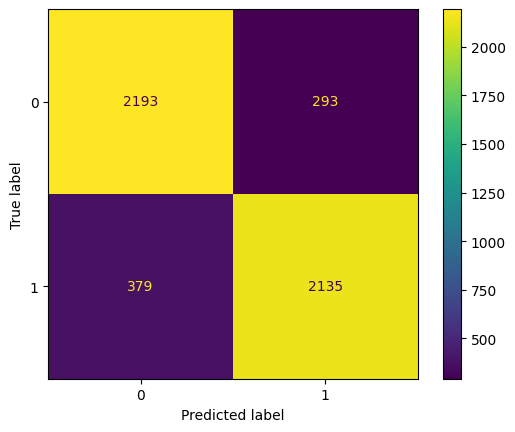

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix1, display_labels = [0, 1])

cm_display.plot()
plt.show()

# Logestic Regression Model

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
log_pre=model.predict(x_vald)

In [ ]:
accuracy_log = accuracy_score(y_vald, log_pre)
print(f"Accuracy: {accuracy_log:.2f}")

Accuracy: 0.89


In [ ]:
conf_matrix3 = confusion_matrix(y_vald, log_pre)

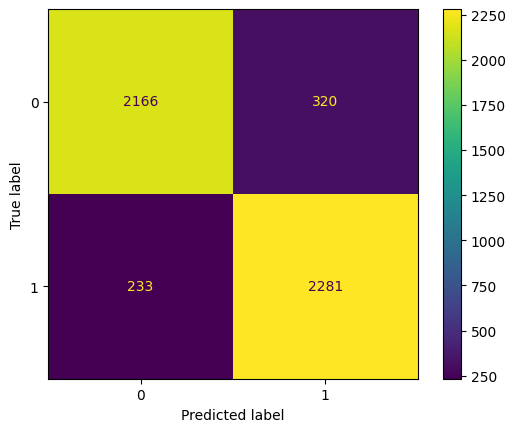

In [ ]:
cm_display3 = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix3, display_labels = [0, 1])

cm_display3.plot()
plt.show()


# Support Vector Model

In [ ]:
# Create and train the SVM model
model2 = SVC(kernel='linear')  # Linear kernel for binary classification
model2.fit(x_train, y_train)


SVC(kernel='linear')

In [ ]:
# Make predictions on the test data
svc_pre = model2.predict(x_vald)


In [ ]:
# Evaluate accuracy
accuracy_svc = accuracy_score(y_vald, svc_pre)
print(f"Accuracy: {accuracy_svc:.2f}")

Accuracy: 0.90


In [ ]:
conf_matrix4=confusion_matrix(y_vald,svc_pre)

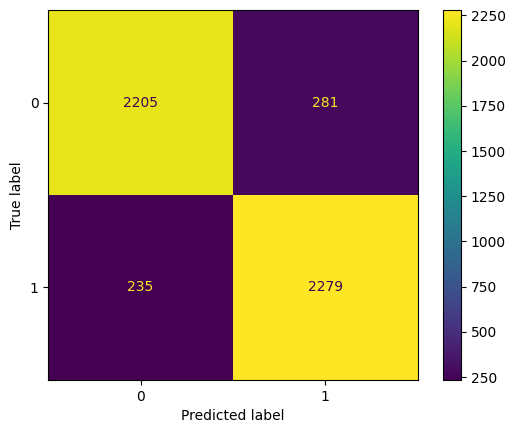

In [ ]:
cm_display4 = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix4, display_labels = [0, 1])

cm_display4.plot()
plt.show()


In [ ]:
df_t=pd.read_csv('/content/Test.csv')

In [ ]:
df_t

,id,text,label
0,0,I always wrote this series off as being a comp...,NaN
1,1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,NaN
2,2,This movie was so poorly written and directed ...,NaN
3,3,The most interesting thing about Miryang (Secr...,NaN
4,4,"when i first read about ""berlin am meer"" i did...",NaN
...,...,...,...
4995,4995,This is the kind of picture John Lassiter woul...,NaN
4996,4996,A MUST SEE! I saw WHIPPED at a press screening...,NaN
4997,4997,NBC should be ashamed. I wouldn't allow my chi...,NaN
4998,4998,This movie is a clumsy mishmash of various gho...,NaN


In [ ]:
df_t['text'] = df_t['text'].str.replace('[^\w\s]','')
df_t['text'] = df_t['text'].str.replace('/><br','')
df_t['text'] = df_t['text'].str.replace("-", "")

In [ ]:
def stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df_t["text"] = df_t["text"].apply(stopwords)

In [ ]:
df_t['text'] = df_t.text.replace(regex = {r'<p>': ' ', r'</p>': '', r'<a.*?\/a>': '+'})

In [ ]:
df_t['text'] = df_t.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

In [ ]:
df_t['text'] = df_t['text'].astype(str)

In [ ]:

df_t['text'] = df_t['text'].apply(lambda text: ' '.join([lmtzr.lemmatize(word) for word in nltk.word_tokenize(text)]))

In [ ]:
xt=tfidf_vectorizer.transform(df_t['text'])

In [ ]:
yt_pred_nb = model.predict(xt)

In [ ]:
yt_pred_nb

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
df_sub=pd.read_csv('/content/sample_submission.csv')

In [ ]:
df_sub

,id,label
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
...,...,...
4995,4995,NaN
4996,4996,NaN
4997,4997,NaN
4998,4998,NaN


In [ ]:
df_sub['label']=yt_pred_nb

In [ ]:
df_sub.to_csv('nlp4.csv',header=True,index=False)